In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import logging
import matplotlib.pyplot as plt
import numpy as np

from hexagon_utilities import *
from colors import *
import plot_functions as pf
from hex_trees import *
from matplotlib.patches import Ellipse


In [5]:
#https://stackoverflow.com/questions/27161533/find-the-shortest-distance-between-a-point-and-line-segments-not-line
def point_to_line_dist(pt, line_seg_endpoint1, line_seg_endpoint2 ):
    """Calculate the distance between a point and a line segment.

    To calculate the closest distance to a line segment, we first need to check
    if the point projects onto the line segment.  If it does, then we calculate
    the orthogonal distance from the point to the line.
    If the point does not project to the line segment, we calculate the 
    distance to both endpoints and take the shortest distance.

    :param point: Numpy array of form [x,y], describing the point.
    :type point: numpy.core.multiarray.ndarray
    :param line: list of endpoint arrays of form [P1, P2]
    :type line: list of numpy.core.multiarray.ndarray
    :return: The minimum distance to a point.
    :rtype: float
    """
    
    point = np.array(pt)
    line = np.array([[line_seg_endpoint1[0], line_seg_endpoint1[1]] ,
                     [line_seg_endpoint2[0], line_seg_endpoint2[1]]])
                     
    
    # unit vector
    unit_line = line[1] - line[0]
    norm_unit_line = unit_line / np.linalg.norm(unit_line)

    # compute the perpendicular distance to the theoretical infinite line
    segment_dist = (
        np.linalg.norm(np.cross(line[1] - line[0], line[0] - point)) /
        np.linalg.norm(unit_line)
    )

    diff = (
        (norm_unit_line[0] * (point[0] - line[0][0])) + 
        (norm_unit_line[1] * (point[1] - line[0][1]))
    )

    x_seg = (norm_unit_line[0] * diff) + line[0][0]
    y_seg = (norm_unit_line[1] * diff) + line[0][1]

    endpoint_dist = min(
        np.linalg.norm(line[0] - point),
        np.linalg.norm(line[1] - point)
    )

    # decide if the intersection point falls on the line segment
    lp1_x = line[0][0]  # line point 1 x
    lp1_y = line[0][1]  # line point 1 y
    lp2_x = line[1][0]  # line point 2 x
    lp2_y = line[1][1]  # line point 2 y
    is_betw_x = lp1_x <= x_seg <= lp2_x or lp2_x <= x_seg <= lp1_x
    is_betw_y = lp1_y <= y_seg <= lp2_y or lp2_y <= y_seg <= lp1_y
    if is_betw_x and is_betw_y:
        return segment_dist
    else:
        # if not, then return the minimum distance to the segment endpoints
        return endpoint_dist

In [6]:
point_to_line_dist((1,5), (2,2), line_seg_endpoint2=(2,7))

1.0

## Try it with a Hexagon's Vertices

[3.0621778264910713, 2.660254037844386, 8.430714770757419, 14.258330249197703, 14.660254037844386, 9.219544457292887]


(-11.0, 11.0, -9.526279441628828, 9.526279441628828)

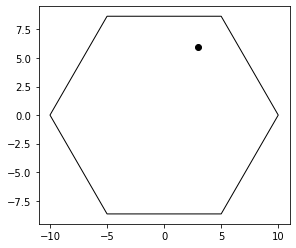

In [7]:
fig, ax = plt.subplots()
h = Hex(0,0,10)
vs = h.get_verts()
pt = (3,6)

dists = []
for v in range(6):
    dists.append(point_to_line_dist(pt, vs[v], vs[(v+1)%6]))
    
print(dists)
plt.plot(*pt, 'ko')
    
h.render(fill=None)
plt.axis('scaled')

[3.0621778264910713, 2.660254037844386, 8.430714770757419, 14.258330249197703, 14.660254037844386, 9.219544457292887]


(-11.0, 11.0, -9.526279441628828, 9.526279441628828)

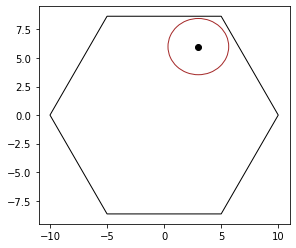

In [8]:
fig, ax = plt.subplots()
h = Hex(0,0,10)
vs = h.get_verts()
pt = (3,6)

dists = []
for v in range(6):
    dists.append(point_to_line_dist(pt, vs[v], vs[(v+1)%6]))
    
print(dists)
plt.plot(*pt, 'ko')

dia = min(dists)*2
ht = dia * np.random.random()
ar = Arc(pt, dia, ht, theta1=0, theta2=360, color='brown')
ax.add_patch(ar)


h.render(fill=None)
plt.axis('scaled')

(-11.0, 11.0, -9.526279441628828, 9.526279441628828)

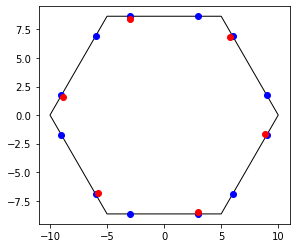

In [9]:
fig, ax = plt.subplots()
h = Hex(0,0,10)
vs = h.get_verts()
pt = (3,6)

dist=0.2
pts = h.point(pt_name='vertex', dist=dist, theta=30)
for p in pts:
    plt.plot(*p, 'bo')
    
pts = h.point(pt_name='vertex', dist=dist, theta=-90)
for p in pts:
    plt.plot(*p, 'bo')

pts = h.point(pt_name='vertex', dist=dist, theta=np.random.randint(0,120)-90)
for p in pts:
    plt.plot(*p, 'ro')
    
    

h.render(fill=None)
plt.axis('scaled')

Make getting the minimum distance into its own function, so that it can be abstracted away.

In [10]:
def get_distance_pt_to_hexagon(pt, h):
    
    vs = h.get_verts()
    dists = []
    for v in range(6):
        dists.append(point_to_line_dist(pt, vs[v], vs[(v+1)%6]))
    return min(dists)

(-11.0, 11.0, -9.526279441628828, 9.526279441628828)

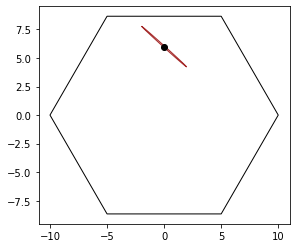

In [11]:
fig, ax = plt.subplots()
h = Hex(0,0,10)
pt = (0,6)

get_distance_pt_to_hexagon(pt, h)
plt.plot(*pt, 'ko')

dia = min(dists)*2
ht = dia * np.random.random()
angle = np.random.random() * 180
ar = Arc(pt, dia, ht, angle=angle, theta1=0, theta2=360, color='brown')
ax.add_patch(ar)


h.render(fill=None)
plt.axis('scaled')

In [12]:
h.point(pt_name='center', action='random', index=0)

[(5.061028963265889, 6.716212277772909)]

(-11.0, 11.0, -9.526279441628828, 9.526279441628828)

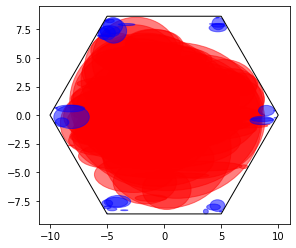

In [13]:
fig, ax = plt.subplots()
h = Hex(0,0,10)
pt = (0,6)

for p in range(50):
    pt = h.point(pt_name='center', action='random', index=np.random.randint(6))[0]
    dist = get_distance_pt_to_hexagon(pt, h)
    dia = dist*2
    ht = dia * np.random.random()
    angle = np.random.random() * 180
    a = Ellipse(pt, dia, ht, 0, color='red', lw=1, alpha=0.5)
    ax.add_patch(a)

for p in range(40): 
    pt = h.point(pt_name='vertex', dist=0.2*np.random.random(), 
                 theta=np.random.randint(0,120)-90)[np.random.randint(6)]
    dist = get_distance_pt_to_hexagon(pt, h)
    dia = dist*2
    ht = dia * np.random.random()
    angle = np.random.random() * 180
    a = Ellipse(pt, dia, ht, 0, color='blue', lw=1, alpha=0.5)
    ax.add_patch(a)


h.render(fill=None)
plt.axis('scaled')

This is exactly what I was hoping for, but aesthetically, it is a failure. This doesn't seem to warrant tiling at all.
So I went back to the drawing board. I want to generate points in a different way.

1. Points will form circles that don't intersect. (Non-overlapping circles are important.)
2. Try to fill as much of the hexagon as possible.

That's what I am trying next:

I will store each bubble point, as well as its radius. That is its own 'personal space'

(-7.5, -4.330127018922192) 3 51


(-11.0, 11.0, -9.526279441628828, 9.526279441628828)

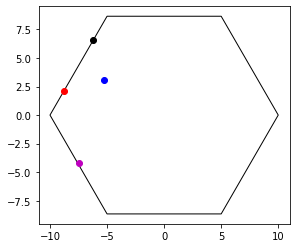

In [15]:
def get_pt_from_emp(h):
    edgenum = np.random.randint(6)
    rpt = h.get_edge_midpoints()[edgenum]
    theta_offset=np.random.randint(0,180)
    dist = np.random.random() * 0.3
    pt = h.get_points_to_points_rtheta(rpt, dist_frac=dist, 
                                      theta_offset=theta_offset, 
                                      index=edgenum)
    print(rpt, edgenum, theta_offset)
    return pt


h = Hex(0,0,10)

ex = 2
rpt = h.get_edge_midpoints()[ex]
newpt = h.get_points_to_points_rtheta(rpt, dist_frac=0.3, theta_offset=0, index=ex)
plt.plot(*newpt, 'o', color='k')
newpt = h.get_points_to_points_rtheta(rpt, dist_frac=0.3, theta_offset=90, index=ex)
plt.plot(*newpt, 'o', color='b')
newpt = h.get_points_to_points_rtheta(rpt, dist_frac=0.3, theta_offset=180, index=ex)
plt.plot(*newpt, 'o', color='r')

ptr = get_pt_from_emp(h)
plt.plot(*ptr, 'o', color='m')

h.render(fill=None)
plt.axis('scaled')



In [25]:
def get_pt_from_emp(h): #EMP is edge mid point
    edgenum = np.random.randint(6)
    rpt = h.get_edge_midpoints()[edgenum]
    theta_offset=np.random.randint(0,180)
    dist = np.random.random() * 0.3
    pt = h.get_points_to_points_rtheta(rpt, dist_frac=dist, 
                                      theta_offset=theta_offset, 
                                      index=edgenum)
    return pt


def get_candidate_point(h):
    
    dist = np.random.random()
    if dist < 0.1:
        pt = h.point(pt_name='center', dist=dist, theta = np.random.randint(0,360),
                     index=np.random.randint(6))[0]
        #print(f'dist {dist}')
    elif dist < 0.8:
        pt = h.point(pt_name='vertex', dist=dist,
                     theta=np.random.randint(0,120)-90)[np.random.randint(6)]
        
    else: #off of the midpoint of edge
        pt = get_pt_from_emp(h)
        
    return pt

(-0.05, 1.05, -0.05, 1.05)

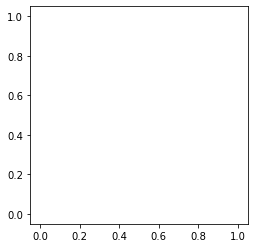

In [17]:
bubbles = []

for _ in range(200):
    
    pt = get_candidate_point(h)
    min_dist = get_distance_pt_to_hexagon(pt, h) #its distance to the nearest hexagon wall. Radius cannot be bigger than this
    
    #check will all existing bubbles to ensure No trespassing:
    for bbl in bubbles:
        dist = pf.distance_pt_to_pt(bbl[0], pt) - bbl[1]
        if dist < min_dist:
            min_dist = dist
        
    if min_dist > 0:
        dia = min_dist*2
        #ht = dia * np.random.random()
        #angle = np.random.random() * 180
        a = Ellipse(pt, dia, dia, 0, color='red', lw=1, alpha=0.4)
        ax.add_patch(a)
        
        bubbles.append([pt, min_dist])


#h.render(fill=None)
plt.axis('scaled')

NameError: name 'hex_cookie_cutter' is not defined

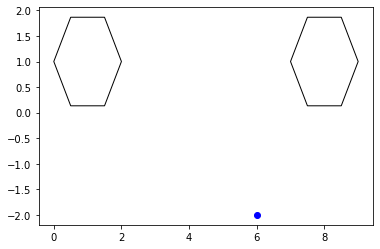

In [18]:
            
fig, ax = plt.subplots()
  
h1 = Hex(1,1,1)
h1.render(fill=None)
h2 = Hex(8,1,1)
h2.render(fill=None)

DEBUG = True
circle_center = (6,-2)
if DEBUG:
    plt.plot(*circle_center, 'bo')

    
for h in [h1, h2]:
    hex_cookie_cutter(h, colors='red', ax=ax)#,# circle_center, min_dist=2, max_dist=6.1, step=0.3, color='maroon', lw=2)
    
plt.axis('scaled')

In [42]:
def hex_cookie_cutter(h, colors, ax, **kwargs):

    if ax is None:
        ax = plt.gca()

    bubbles = []
    for _ in range(250):

        pt = get_candidate_point(h)
        #its distance to the nearest hexagon wall. Radius cannot be bigger than this
        min_dist = get_distance_pt_to_hexagon(pt, h) 
                
        #check will all existing bubbles to ensure No trespassing:
        for bbl in bubbles:
            dist = pf.distance_pt_to_pt(bbl[0], pt) - bbl[1]
            if dist < min_dist:
                min_dist = dist

        #Adding this to stop large bubble circles...
        if min_dist > h.size*0.5:
            min_dist/=2

        if min_dist > 0:
            dia = min_dist*2
            #ht = dia * np.random.random()
            #angle = np.random.random() * 180
            #clr = get_rnd_color_from_family(colors)
            fill = True if np.random.random() < 0.5 else False
            alpha=0.7 if fill else 1
            a = Ellipse(pt, dia, dia, 0, color=colors, lw=3, fill=fill, alpha=alpha)
            ax.add_patch(a)

            bubbles.append([pt, min_dist])

# Bubbles Variations

1. Colors. Each hexagon is one color. One family
2. Bubbles filled vs. Circles
3. All Bubbles of the same size
4. Ellipses occasionally
4. Draw Selected Edges

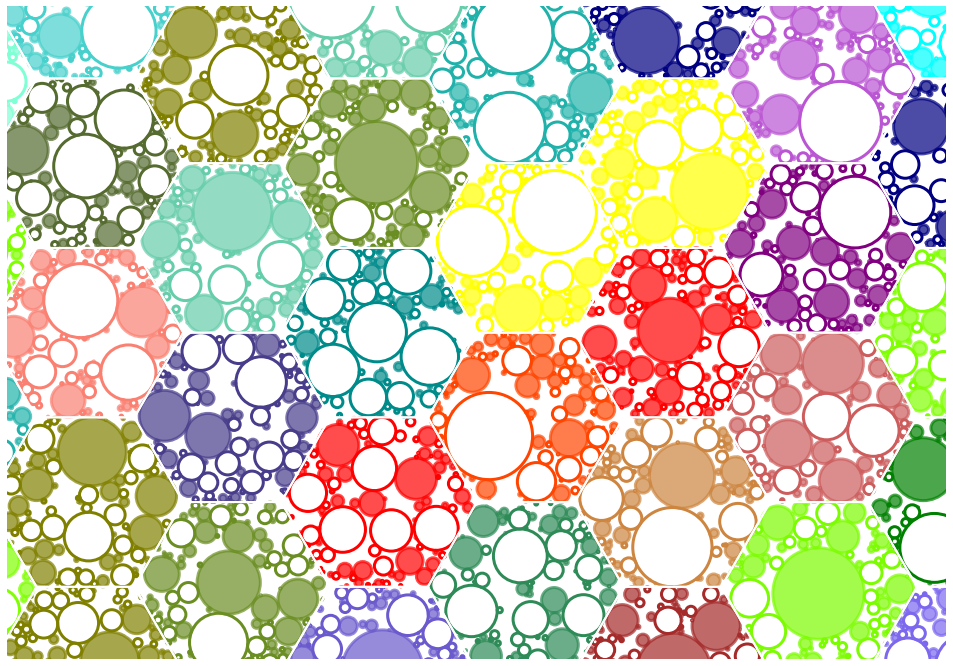

In [43]:
def main():
    
    logging.basicConfig(filename='hexagon_designs.log',level=logging.INFO)    
    nbk = 18
    
    fig, ax = plt.subplots(figsize=(18,12))

    bg_color = 'w'
    fig.patch.set_facecolor(bg_color)

    size=2
    num_rows, num_cols = 11, 6
    
    hg = HexGrid(num_rows, num_cols, size, flat=True)
    
    COL = RED_BROWNS + PURPLES #+ PINKS_HIGH_SAT + BLUES_HIGH_SAT + YELLOWS_HIGH_SAT + GREENS_HIGH_SAT
    COL = HIGH_SAT
    for h in hg.hlist:
        #colors = get_rnd_color_from_family(COL)
        #cfam = get_rnd_family()
        col = get_rnd_color_from_family(COL)
        hex_cookie_cutter(h, col, ax)
        h.render(fill=None, lw=2, color='white', zorder=3)
    
    plt.axis('scaled')
    xclip, yclip = 0.8, 0.7
    y_range = size * 1.732 * num_rows / 4 * yclip
    x_range = size * num_cols * xclip
    ax.set_ybound(lower=-1*y_range, upper=y_range)
    ax.set_xbound(lower=-1*x_range, upper=x_range)
    plt.axis('off')
    
    pf.save_file(fig, 
              f'Bubbles_',
              nbk = nbk,
              num_rows=num_rows, 
              num_cols=num_cols
            )

    
    logging.info('Finished')

if __name__ == '__main__':
    main()


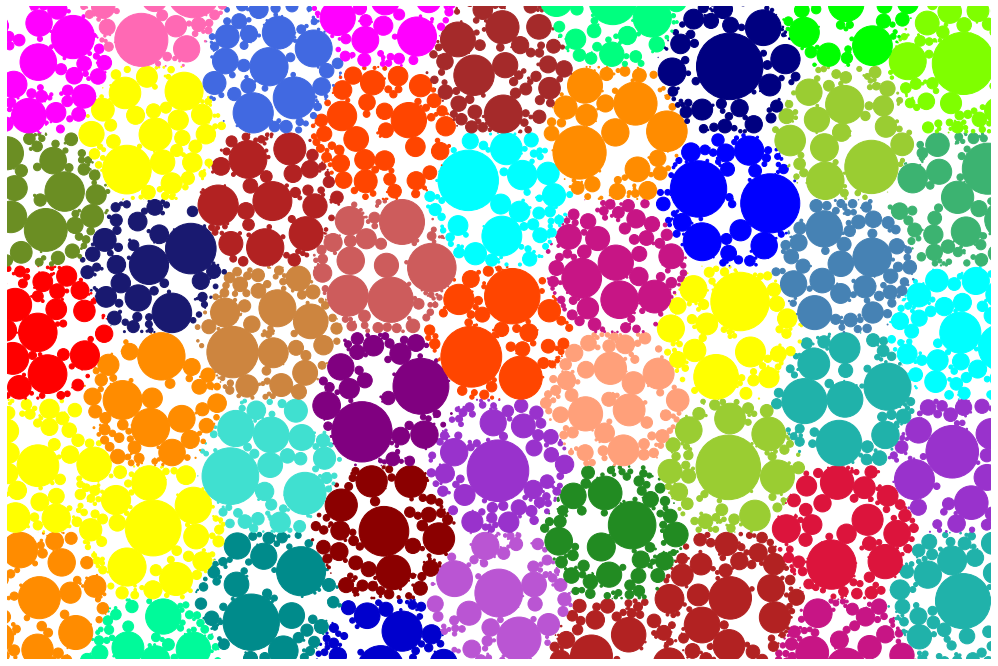

In [539]:
def main():
    
    logging.basicConfig(filename='hexagon_designs.log',level=logging.INFO)    
    nbk = 18
    
    fig, ax = plt.subplots(figsize=(18,12))

    bg_color = 'w'
    fig.patch.set_facecolor(bg_color)

    size=2
    num_rows, num_cols = 14, 8
    
    hg = HexGrid(num_rows, num_cols, size, flat=True)
    
    COL = HIGH_SAT

    for h in hg.hlist:
        colors = get_rnd_color_from_family(COL)
        hex_cookie_cutter(h, colors, ax)
        
    plt.axis('scaled')
    xclip, yclip = 0.8, 0.7
    y_range = size * 1.732 * num_rows / 4 * yclip
    x_range = size * num_cols * xclip
    ax.set_ybound(lower=-1*y_range, upper=y_range)
    ax.set_xbound(lower=-1*x_range, upper=x_range)
    plt.axis('off')
    
    pf.save_file(fig, 
              f'Bubbles_',
              nbk = nbk,
              num_rows=num_rows, 
              num_cols=num_cols
            )

    
    logging.info('Finished')

if __name__ == '__main__':
    main()


In [ ]:
COL = YELLOWS_HIGH_SAT + GREENS_HIGH_SAT
#COL = BLACK_WHITES_LOW_SAT
COL = GREENS_HIGH_SAT + RED_BROWNS_HIGH_SAT


COL_SEQ = [#RED_BROWNS, 
           #GREENS, 
            BLACK_WHITES_LOW_SAT,
           BLUES, PINKS_LOW_SAT
            # GREENS, BROWNS]
            #           BEIGES, BLUES, ORANGES, CYANS, YELLOWS]
            ]


#COL_SEQ = [mcolor_names]

COL1 = [RED_BROWNS, BLACK_WHITES_LOW_SAT,
           BLUES]# GREENS, BROWNS]
#           BEIGES, BLUES, ORANGES, CYANS, YELLOWS]


COL2 = [mcolor_names]